# Boston_Housing - Regression Analysis

## Import TensorFlow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.4.1'

* GPU 설정 Off

In [3]:
tf.test.gpu_device_name()

''

* import Keras

In [4]:
import keras

keras.__version__

'2.4.3'

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [5]:
from keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

In [6]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [7]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets, 
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [9]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [10]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [11]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 4분

In [12]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 3ms/step - loss: 300.2876 - mae: 14.6040 - val_loss: 52.9638 - val_mae: 4.2861
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 31.5629 - mae: 4.0576 - val_loss: 34.6238 - val_mae: 3.5591
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 22.3917 - mae: 3.1334 - val_loss: 27.3635 - val_mae: 2.8790
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 14.5172 - mae: 2.4898 - val_loss: 25.4123 - val_mae: 2.6256
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 11.6264 - mae: 2.5028 - val_loss: 21.8376 - val_mae: 2.5788
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 17.8649 - mae: 2.6362 - val_loss: 23.7862 - val_mae: 2.8247
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 10.3876 - mae: 2.2679 - val_loss: 21.1079 - val_mae: 2.5892
Epoch 8/500
323/323 [==============================] 

> ## 4) Model Evaluate

In [13]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 15.5229 - mae: 2.7352
MAE is : 2.7352373600006104


> ## 5) Visualization

* 전체 시각화

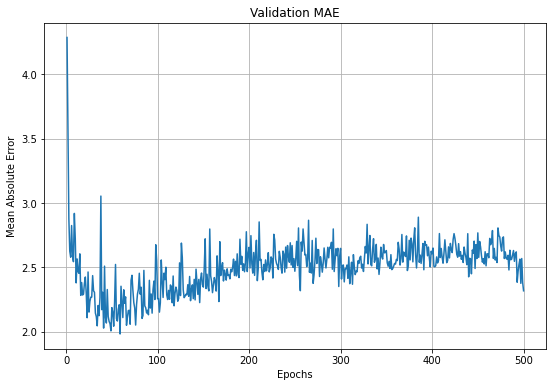

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

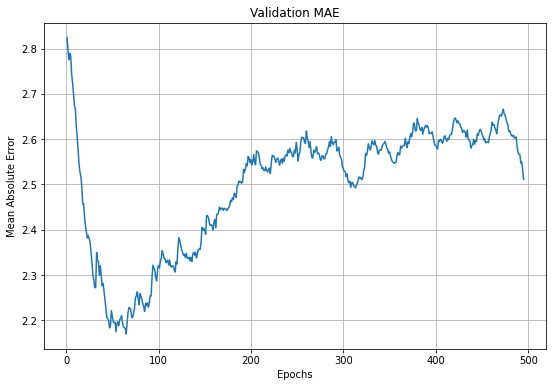

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 6) Keras Session Clear

In [16]:
from keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [17]:
from keras import models
from keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [18]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [19]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', 
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [20]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 285.0192 - mae: 14.2662 - val_loss: 47.7060 - val_mae: 4.1081

Epoch 00001: val_mae improved from inf to 4.10813, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 29.8795 - mae: 3.9886 - val_loss: 28.4912 - val_mae: 3.5602

Epoch 00002: val_mae improved from 4.10813 to 3.56025, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 23.9701 - mae: 3.5898 - val_loss: 24.2923 - val_mae: 2.7334

Epoch 00003: val_mae improved from 3.56025 to 2.73341, saving model to best_boston.h5
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 18.6908 - mae: 2.8455 - val_loss: 22.8034 - val_mae: 2.6421

Epoch 00004: val_mae improved from 2.73341 to 2.64208, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 15.3465 - mae: 2.6044 - val_loss: 18.17

> ## 5) Best Model

In [21]:
!ls -l

total 76
-rw-r--r-- 1 root root 70296 Mar 19 05:59 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


> ## 6) Model Evaluate

In [22]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 17.6510 - mae: 2.2457
MAE is : 2.245696783065796


# 
# 
# 
# The End
# 
# 
# 